In [5]:
sign_dict = {
    0: "Không phải biển báo",
    1: "Cấm vào",
    2: "Cấm đỗ/đợi",
    3: "Cấm quay đầu",
    4: "Tốc độ tối đa",
    5: "Các biển báo cấm khác",
    6: "Cảnh báo",
    7: "Bắt buộc",
}

In [6]:
img_dir = "../data/images01"

In [28]:
import os

categories = os.listdir(img_dir)
print(categories)

['0', '1', '2', '3', '4', '5', '6', '7']


In [29]:
data = []
labels = []
imagePaths = []

HEIGHT = 75
WIDTH = 75

N_CHANNELS = 3

In [30]:
import os
import random
# Grab image path
for k, category in enumerate(categories):
    category_path = os.path.join(img_dir, category)
    for image in os.listdir(category_path):
        imagePaths.append([os.path.join(category_path, image), int(category)])

# Random image path
random.shuffle(imagePaths)


In [31]:
print(imagePaths)

[['../data/images01\\2\\702.png', 2], ['../data/images01\\2\\562.png', 2], ['../data/images01\\4\\69.png', 4], ['../data/images01\\7\\454.png', 7], ['../data/images01\\0\\object_35_15.jpg', 0], ['../data/images01\\2\\259.png', 2], ['../data/images01\\7\\371.png', 7], ['../data/images01\\6\\18.png', 6], ['../data/images01\\6\\517.png', 6], ['../data/images01\\6\\356.png', 6], ['../data/images01\\0\\object_23_13.jpg', 0], ['../data/images01\\4\\144.png', 4], ['../data/images01\\2\\529.png', 2], ['../data/images01\\4\\406.png', 4], ['../data/images01\\1\\138.png', 1], ['../data/images01\\0\\object_38_0.jpg', 0], ['../data/images01\\2\\473.png', 2], ['../data/images01\\7\\245.png', 7], ['../data/images01\\7\\264.png', 7], ['../data/images01\\6\\3.png', 6], ['../data/images01\\6\\95.png', 6], ['../data/images01\\3\\312.png', 3], ['../data/images01\\0\\object_47_5.jpg', 0], ['../data/images01\\7\\116.png', 7], ['../data/images01\\0\\object_38_9.jpg', 0], ['../data/images01\\4\\402.png', 4], 

In [32]:
import cv2
# Append image to DATA list
for imagePath in imagePaths:

    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))
    data.append(image)

    # Labels list
    label = imagePath[1]
    labels.append(label)

In [33]:
import numpy as np
# Convert to numpy array
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)


In [34]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=50)

In [35]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(3743, 75, 75, 3)
(936, 75, 75, 3)
(3743,)
(936,)


In [36]:
from keras.utils import np_utils
trainY = np_utils.to_categorical(trainY, 8)
print(trainY)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [37]:
EPOCHS = 5
INIT_LR = 1e-3
BS = 32

class_names = categories

In [38]:
import tensorflow as tf

from keras.applications import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Sequential
from keras import layers


inceptionv3 = InceptionV3(input_shape=(75, 75, 3), include_top=False, weights='imagenet')
for layer in inceptionv3.layers:
    layer.trainable = False

model = Sequential()

model.add(inceptionv3)
model.add(GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(len(class_names), activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 8)                 16392     
                                                                 
Total params: 21,819,176
Trainable params: 16,392
Non-trainable params: 21,802,784
_____________________________________

In [39]:
model.fit(trainX, trainY, batch_size=BS, epochs=EPOCHS, verbose=1)

Epoch 1/5
117/117 [==============================] - 20s 133ms/step - loss: 1.1357 - accuracy: 0.6134
Epoch 2/5
117/117 [==============================] - 20s 171ms/step - loss: 0.5459 - accuracy: 0.8261
Epoch 3/5
117/117 [==============================] - 22s 188ms/step - loss: 0.4458 - accuracy: 0.8573
Epoch 4/5
117/117 [==============================] - 23s 198ms/step - loss: 0.3923 - accuracy: 0.8763
Epoch 5/5
117/117 [==============================] - 21s 176ms/step - loss: 0.3522 - accuracy: 0.8902


30/30 [==============================] - 5s 110ms/step


C:\Users\trung\AppData\Local\Temp\ipykernel_4092\1649987158.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
C:\Users\trung\AppData\Local\Temp\ipykernel_4092\1649987158.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


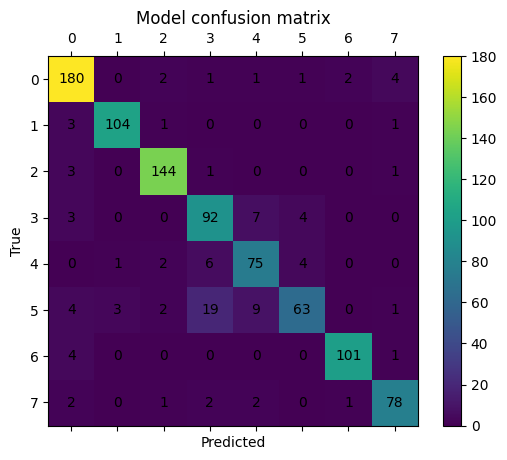

Accuracy : 89.42%


In [40]:
from numpy import  argmax
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

pred = model.predict(testX)
predictions = argmax(pred, axis=1)

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(8):
    for j in range(8):
        ax.text(i, j, cm[j, i], va='center', ha='center')


plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))